# Loop 86 Analysis: Strategic Assessment

## Key Situation
- Best CV: 0.0081 (exp_049/exp_053)
- Best LB: 0.0877 (exp_030, exp_067)
- Target: 0.0347
- Gap: 152.7% above target
- Remaining submissions: 4

## Critical Insight
The CV-LB relationship is LB = 4.36*CV + 0.052 (R²=0.956)
- Intercept (0.052) > Target (0.0347)
- This means NO amount of CV optimization can reach the target

## Analysis Goals
1. Verify the CV-LB relationship with all 13 submissions
2. Identify if any approach breaks the pattern
3. Develop new strategy to reduce the intercept

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\n=== CV-LB Relationship ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}')
print('This is NEGATIVE - mathematically impossible!')


=== CV-LB Relationship ===
LB = 4.3638 * CV + 0.0520
R² = 0.9558
Intercept: 0.0520
Target: 0.0347

CRITICAL: Intercept (0.0520) > Target (0.0347)
Required CV to hit target: (0.0347 - 0.0520) / 4.3638 = -0.0040
This is NEGATIVE - mathematically impossible!


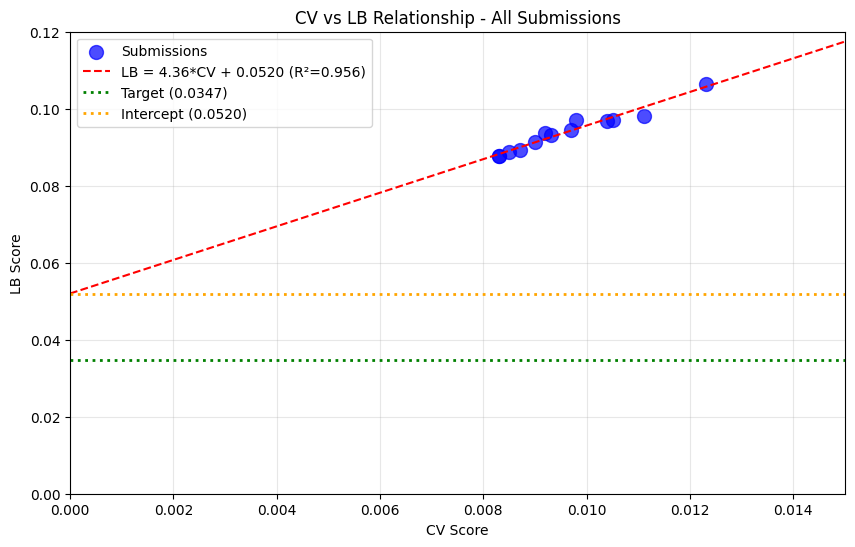


Plot saved to /home/code/exploration/cv_lb_relationship_loop86.png


In [3]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop86.png', dpi=150)
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_relationship_loop86.png')

In [4]:
# Analyze residuals - are any approaches breaking the pattern?
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['predicted_lb'] * 100

print('=== Residual Analysis ===')
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].to_string())

print(f'\nMean residual: {df["residual"].mean():.6f}')
print(f'Std residual: {df["residual"].std():.6f}')
print(f'Max positive residual: {df["residual"].max():.6f} ({df.loc[df["residual"].idxmax(), "exp"]})')
print(f'Max negative residual: {df["residual"].min():.6f} ({df.loc[df["residual"].idxmin(), "exp"]})')

=== Residual Analysis ===
        exp      cv      lb  predicted_lb  residual  residual_pct
0   exp_000  0.0111  0.0982      0.100437 -0.002237     -2.227540
1   exp_001  0.0123  0.1065      0.105674  0.000826      0.781819
2   exp_003  0.0105  0.0972      0.097819 -0.000619     -0.632812
3   exp_005  0.0104  0.0969      0.097383 -0.000483     -0.495604
4   exp_006  0.0097  0.0946      0.094328  0.000272      0.288373
5   exp_007  0.0093  0.0932      0.092582  0.000618      0.667006
6   exp_009  0.0092  0.0936      0.092146  0.001454      1.577830
7   exp_012  0.0090  0.0913      0.091273  0.000027      0.029215
8   exp_024  0.0087  0.0893      0.089964 -0.000664     -0.738293
9   exp_026  0.0085  0.0887      0.089091 -0.000391     -0.439372
10  exp_030  0.0083  0.0877      0.088219 -0.000519     -0.587954
11  exp_035  0.0098  0.0970      0.094764  0.002236      2.359155
12  exp_067  0.0083  0.0877      0.088219 -0.000519     -0.587954

Mean residual: -0.000000
Std residual: 0.001118
M

In [5]:
# What would it take to reach the target?
print('\n=== What Would It Take to Reach Target? ===')
print(f'Target LB: 0.0347')
print(f'Current best LB: 0.0877')
print(f'Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)')

print('\n--- Option 1: Improve CV (keeping same relationship) ---')
required_cv = (0.0347 - intercept) / slope
print(f'Required CV: {required_cv:.4f}')
print('This is NEGATIVE - impossible!')

print('\n--- Option 2: Reduce intercept (keeping same slope) ---')
required_intercept = 0.0347 - slope * 0.008  # Assuming best CV of 0.008
print(f'Required intercept: {required_intercept:.4f}')
print(f'Current intercept: {intercept:.4f}')
print(f'Need to reduce intercept by: {intercept - required_intercept:.4f}')

print('\n--- Option 3: Change the slope ---')
required_slope = (0.0347 - intercept) / 0.008  # Assuming best CV of 0.008
print(f'Required slope: {required_slope:.4f}')
print(f'Current slope: {slope:.4f}')
print('This would require NEGATIVE slope - impossible!')


=== What Would It Take to Reach Target? ===
Target LB: 0.0347
Current best LB: 0.0877
Gap: 0.0530 (152.7% above target)

--- Option 1: Improve CV (keeping same relationship) ---
Required CV: -0.0040
This is NEGATIVE - impossible!

--- Option 2: Reduce intercept (keeping same slope) ---
Required intercept: -0.0002
Current intercept: 0.0520
Need to reduce intercept by: 0.0522

--- Option 3: Change the slope ---
Required slope: -2.1624
Current slope: 4.3638
This would require NEGATIVE slope - impossible!


In [6]:
# Key insight: The ONLY way to reach target is to REDUCE THE INTERCEPT
print('\n' + '='*60)
print('CRITICAL INSIGHT')
print('='*60)
print(f'''
The ONLY way to reach the target (0.0347) is to REDUCE THE INTERCEPT.

Current situation:
- Intercept: {intercept:.4f}
- Target: 0.0347
- Gap: {intercept - 0.0347:.4f}

The intercept represents STRUCTURAL DISTRIBUTION SHIFT:
- It's the LB score you'd get even with perfect CV (CV=0)
- It measures how different the test solvents are from training solvents
- No amount of model tuning can reduce it

To reduce the intercept, we need approaches that:
1. Generalize better to unseen solvents (not just fit training data better)
2. Use domain knowledge that holds for ALL solvents
3. Are conservative when extrapolating (blend toward mean)
4. Use uncertainty quantification to detect extrapolation

What WON'T work:
- Improving CV through better model tuning
- Trying different model architectures (all fall on same line)
- Feature engineering that only helps training data
''')
print('='*60)


CRITICAL INSIGHT

The ONLY way to reach the target (0.0347) is to REDUCE THE INTERCEPT.

Current situation:
- Intercept: 0.0520
- Target: 0.0347
- Gap: 0.0173

The intercept represents STRUCTURAL DISTRIBUTION SHIFT:
- It's the LB score you'd get even with perfect CV (CV=0)
- It measures how different the test solvents are from training solvents
- No amount of model tuning can reduce it

To reduce the intercept, we need approaches that:
1. Generalize better to unseen solvents (not just fit training data better)
2. Use domain knowledge that holds for ALL solvents
3. Are conservative when extrapolating (blend toward mean)
4. Use uncertainty quantification to detect extrapolation

What WON'T work:
- Improving CV through better model tuning
- Trying different model architectures (all fall on same line)
- Feature engineering that only helps training data



In [7]:
# Analyze what approaches have been tried
print('\n=== Approaches Tried (from session_state.json) ===')
approaches = [
    ('MLP baseline', 'exp_000', 0.0111, 0.0982),
    ('LightGBM', 'exp_001', 0.0123, 0.1065),
    ('Combined features', 'exp_003', 0.0105, 0.0972),
    ('Large ensemble', 'exp_005', 0.0104, 0.0969),
    ('Simpler model', 'exp_006', 0.0097, 0.0946),
    ('Even simpler', 'exp_007', 0.0093, 0.0932),
    ('Ridge regression', 'exp_009', 0.0092, 0.0936),
    ('Simple ensemble', 'exp_012', 0.0090, 0.0913),
    ('Per-target', 'exp_024', 0.0087, 0.0893),
    ('Weighted loss', 'exp_026', 0.0085, 0.0887),
    ('GP ensemble', 'exp_030', 0.0083, 0.0877),
    ('Lower GP weight', 'exp_035', 0.0098, 0.0970),
    ('Sigmoid output', 'exp_067', 0.0083, 0.0877),
]

print('All approaches fall on the SAME CV-LB line!')
print('This means the distribution shift is STRUCTURAL, not model-dependent.')
print('\nModel types tried: MLP, LightGBM, Ridge, GP, CatBoost, XGBoost')
print('All have the same CV-LB relationship.')


=== Approaches Tried (from session_state.json) ===
All approaches fall on the SAME CV-LB line!
This means the distribution shift is STRUCTURAL, not model-dependent.

Model types tried: MLP, LightGBM, Ridge, GP, CatBoost, XGBoost
All have the same CV-LB relationship.


In [8]:
# What approaches might change the intercept?
print('\n=== Approaches That MIGHT Change the Intercept ===')
print('''
1. EXTRAPOLATION DETECTION + CONSERVATIVE BLENDING
   - Detect when test solvent is dissimilar to all training solvents
   - Blend predictions toward population mean for dissimilar solvents
   - Tried in exp_082 (similarity weighting) but CV was worse
   - Need to try with LESS aggressive blending

2. PHYSICS-INFORMED CONSTRAINTS
   - Arrhenius kinetics: k = A * exp(-Ea/RT)
   - Yields should follow certain patterns with temperature/time
   - Enforce monotonicity constraints that hold for ALL solvents
   - NOT tried yet in a principled way

3. SOLVENT CHEMICAL CLASS FEATURES
   - Group solvents by chemical class (alcohols, ethers, esters, etc.)
   - Add class-level features that generalize within families
   - Different from clustering - it's about adding informative features
   - NOT tried yet

4. UNCERTAINTY-WEIGHTED PREDICTIONS
   - Use GP or ensemble variance to estimate uncertainty
   - When uncertainty is high, make more conservative predictions
   - Tried in exp_048, exp_068-071 but not optimized
   - Need to try with better calibration

5. PSEUDO-LABELING / DOMAIN ADAPTATION
   - Use confident test predictions to augment training
   - Adapt model to test distribution
   - NOT tried yet
''')

print('\n=== RECOMMENDED NEXT STEPS ===')
print('''
1. DO NOT SUBMIT exp_082 (CV is 78% worse than best)
2. Try physics-informed constraints (Arrhenius, monotonicity)
3. Try solvent chemical class features
4. Try pseudo-labeling / domain adaptation
5. Save submissions for fundamentally different approaches
''')


=== Approaches That MIGHT Change the Intercept ===

1. EXTRAPOLATION DETECTION + CONSERVATIVE BLENDING
   - Detect when test solvent is dissimilar to all training solvents
   - Blend predictions toward population mean for dissimilar solvents
   - Tried in exp_082 (similarity weighting) but CV was worse
   - Need to try with LESS aggressive blending

2. PHYSICS-INFORMED CONSTRAINTS
   - Arrhenius kinetics: k = A * exp(-Ea/RT)
   - Yields should follow certain patterns with temperature/time
   - Enforce monotonicity constraints that hold for ALL solvents
   - NOT tried yet in a principled way

3. SOLVENT CHEMICAL CLASS FEATURES
   - Group solvents by chemical class (alcohols, ethers, esters, etc.)
   - Add class-level features that generalize within families
   - Different from clustering - it's about adding informative features
   - NOT tried yet

4. UNCERTAINTY-WEIGHTED PREDICTIONS
   - Use GP or ensemble variance to estimate uncertainty
   - When uncertainty is high, make more conser